# Project: Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will be exploring the data set from The Movie Database about movies during the time frame they are in theaters. We'll be looking specifically at what are the most popular genres, the earned profit through time, and most popular months for movies to release. This dataset exploration will give us a better understanding to why movies are released during their respective time frame and if there is profit.

>Questions
>1. The Earned Profit throughout time? 
>2. Most popular genres made?
>3. Time frame in which movies are most popular?


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

>Below is the initial reading of the csv file so we may to view the data we will be investigating.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>df.shape will tell us how many rows and columns there are.

In [4]:
df.shape

(10866, 21)

>df.describe is the summary statistics

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>This df.info() is telling us where some values are missing, this is before removing columns that are not needed.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

# Observation and Reasoning
> From what we see within this dataset is some unnecessary data in terms to what we are questioning. The 'id', imdb_id' are for reference when searching, assuming, from imdb database for a quicker search on their end. 'Homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime' and 'production_companies are more in terms of what the viewer, or the customer, wants to know before a movie or if they want to know more about a movie. 'Vote_count' is data for the imdb site for other customers that are interested in the movie and are deciding to see the movie. 'Release_year' is not used because we will be using 'release_date' as it is a more accurate match to what we are researching for. Lastly, we will use 'budget' and 'revenue' instead of 'budget_adj' and 'revenue_adj' to get the initial numbers for lack of a better word.

### Data Cleaning (Replace this with more specific notes!)

>Here, df.drop, is where we will be removing columns that are not needed.

In [7]:
df.drop(['id', 'imdb_id', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'vote_count', 'release_year', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [8]:
df.head()

,popularity,budget,revenue,original_title,cast,genres,release_date,vote_average
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,3/18/15,6.3
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,4/1/15,7.3


>Now we will run our second df.info() to look at the columns that were no longer needed.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
genres            10843 non-null object
release_date      10866 non-null object
vote_average      10866 non-null float64
dtypes: float64(2), int64(2), object(4)
memory usage: 679.2+ KB


>Fill missing values

In [10]:
df['cast'].fillna('Not Available', inplace=True)
df['genres'].fillna('Not Available', inplace=True)

>This will now inform us that all the columns are now filled with a value.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10866 non-null object
genres            10866 non-null object
release_date      10866 non-null object
vote_average      10866 non-null float64
dtypes: float64(2), int64(2), object(4)
memory usage: 679.2+ KB


>Here we will convert the datatype of release_date to a datetime datatype for easier use.

In [12]:
df['release_date']=pd.to_datetime(df['release_date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10866 non-null object
genres            10866 non-null object
release_date      10866 non-null datetime64[ns]
vote_average      10866 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 679.2+ KB


>We will now see the number of unique values with df.nunique()

In [14]:
df.nunique()

popularity        10814
budget              557
revenue            4702
original_title    10571
cast              10720
genres             2040
release_date       5909
vote_average         72
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


### Q1. The Earned Profit throughout time?

>1. Profit earned analysis

In [15]:
#inserts a new column with the value of revenue - budget as earned_profit
df.insert(3,'earned_profit',df['revenue']-df['budget'])

df.head(5)

,popularity,budget,revenue,earned_profit,original_title,cast,genres,release_date,vote_average
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1
2,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,2015-03-18,6.3
3,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5
4,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,2015-04-01,7.3


>Here we will get movies that were released before 2018-12-31, reason for this is that there are too many movies with incorrect data. We will view movies with the correct dates only.

In [16]:
#selecting data where time frame release date is less than 2018-12-31
rdprf = df[df['release_date'] < '2018-12-31']

#indexing data
rdprf.index = range(len(rdprf))

#starting
rdprf.index = rdprf.index + 1

#show the data
rdprf.head(5)

,popularity,budget,revenue,earned_profit,original_title,cast,genres,release_date,vote_average
1,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5
2,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1
3,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,2015-03-18,6.3
4,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5
5,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,2015-04-01,7.3


In [17]:
#count the rows
len(rdprf)

10574

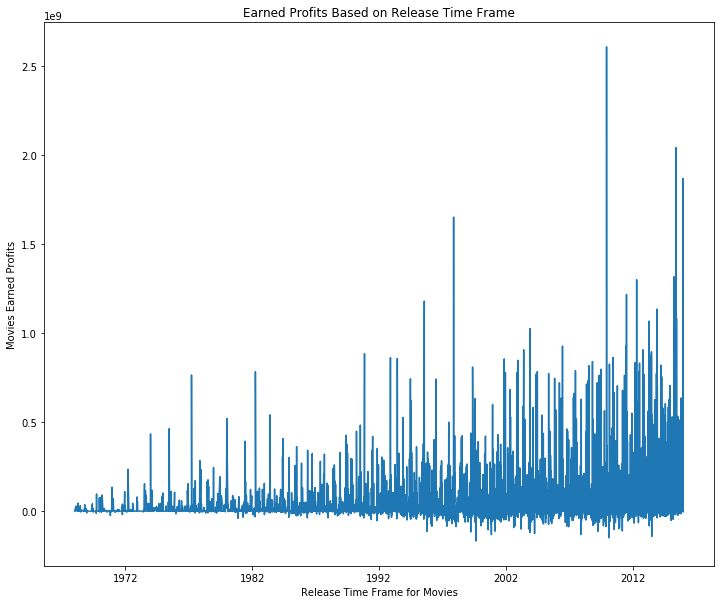

In [18]:
#Here we are adding the combination of release date and earned profit
rl = rdprf.groupby('release_date')['earned_profit'].sum()

#plotting the bar chart
plt.figure(figsize=(12,10))

plt.xlabel('Release Time Frame for Movies', fontsize = 10)

plt.ylabel('Movies Earned Profits', fontsize = 10)

plt.title('Earned Profits Based on Release Time Frame')

plt.plot(rl)


>Based the diagram, as we came closer to present day, the money earned for movies has increased. At the same time, it seems that more movies have also came in losing more money. Nevertheless, there are huge increases of money being spent to make movies with a, so far successful, increase in earning profits. Next we will see what genres seem to be made more.

### Q2. Most popular genres made?

In [19]:
#this will take the genres column to seperate the bars
def genre(column):
    genre = rdprf[column].str.cat(sep = '|')
    
    genre = pd.Series(genre.split('|'))
    
    count = genre.value_counts(ascending = False)
    
    return count

In [20]:
#store value
count = genre('genres')

count.head()

Drama       4626
Comedy      3701
Thriller    2852
Action      2323
Romance     1655
dtype: int64

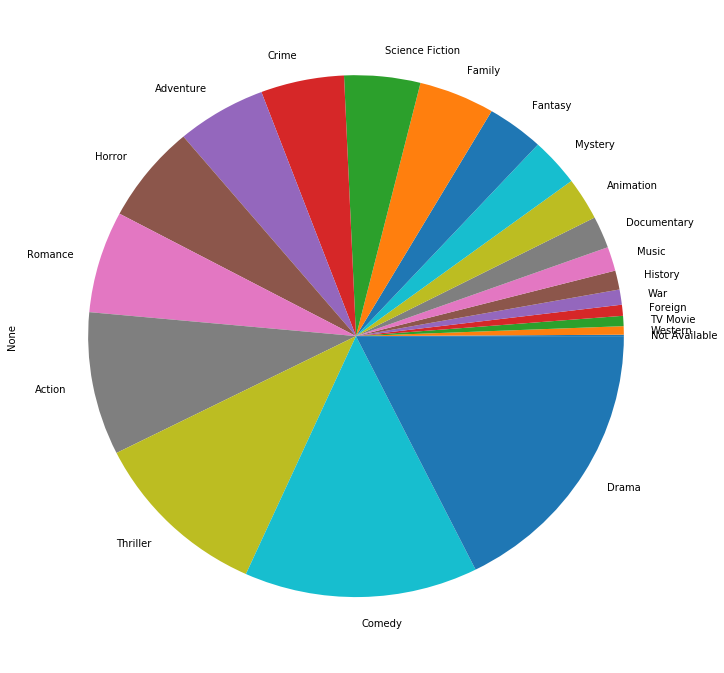

In [26]:
#This will create the pie chart for genres
count.sort_values(ascending = True, inplace = True)

gp = count.plot.pie(y='Popular Genres',figsize=(12,12))

>As we can see, the most popular type of movies made are Dramas and Comedy. This also is a seperation of the data to show us one genre type as oppose to the combination of genres for a better representation of what is popular. Ofcourse most movies are more likely to be a combination, such as war movies that are specified as Drama + War + History...
When it comes down to it, most movies are usually referred to one genre rather than many. 

### Q3. Time frame in which movies are most popular?

>We will begin by looking at the time frame yearly from 2015 to 2012 to see a short trend. First up is 2015:

In [45]:
#selecting data where time frame release date is less than 2018-12-31
rdprf = df[(df['release_date'] < '2015-12-31') & (df['release_date'] > '2015-01-01')]

#indexing data
rdprf.index = range(len(rdprf))

#starting
rdprf.index = rdprf.index + 1

#show the data
rdprf.head(5)

,popularity,budget,revenue,earned_profit,original_title,cast,genres,release_date,vote_average
1,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5
2,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1
3,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,2015-03-18,6.3
4,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5
5,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,2015-04-01,7.3


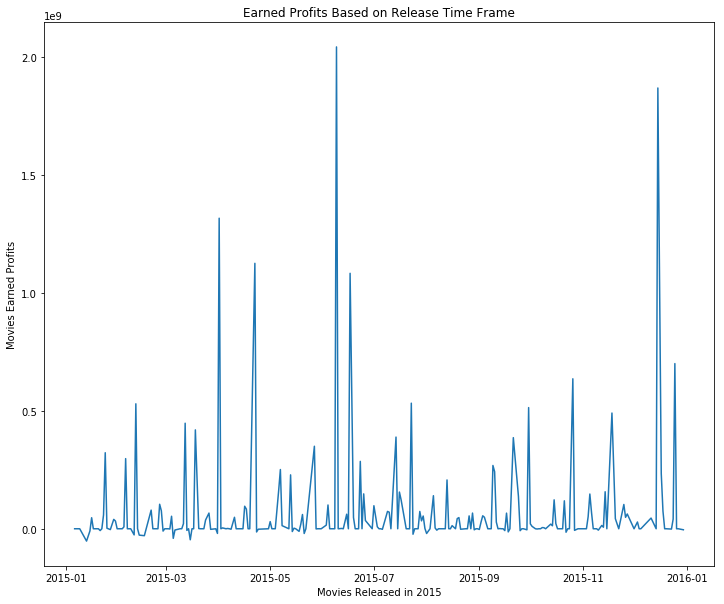

In [49]:
#Here we are adding the combination of release date and earned profit
tl = rdprf.groupby('release_date')['earned_profit'].sum()

#plotting the bar chart
plt.figure(figsize=(12,10))

plt.xlabel('Movies Released in 2015', fontsize = 10)

plt.ylabel('Movies Earned Profits', fontsize = 10)

plt.title('Earned Profits Based on Release Time Frame')

plt.plot(tl)

>We will now look at the data for 2014:

In [50]:
#selecting data where time frame release date is less than 2018-12-31
rdprf = df[(df['release_date'] < '2014-12-31') & (df['release_date'] > '2014-01-01')]

#indexing data
rdprf.index = range(len(rdprf))

#starting
rdprf.index = rdprf.index + 1

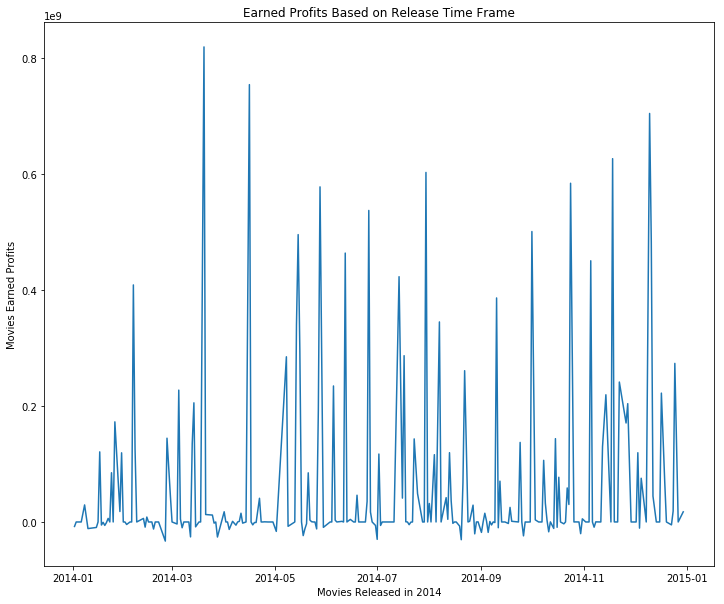

In [52]:
#Here we are adding the combination of release date and earned profit
tl = rdprf.groupby('release_date')['earned_profit'].sum()

#plotting the bar chart
plt.figure(figsize=(12,10))

plt.xlabel('Movies Released in 2014', fontsize = 10)

plt.ylabel('Movies Earned Profits', fontsize = 10)

plt.title('Earned Profits Based on Release Time Frame')

plt.plot(tl)

Now for 2013:

In [55]:
#selecting data where time frame release date is less than 2018-12-31
rdprf = df[(df['release_date'] < '2013-12-31') & (df['release_date'] > '2013-01-01')]

#indexing data
rdprf.index = range(len(rdprf))

#starting
rdprf.index = rdprf.index + 1

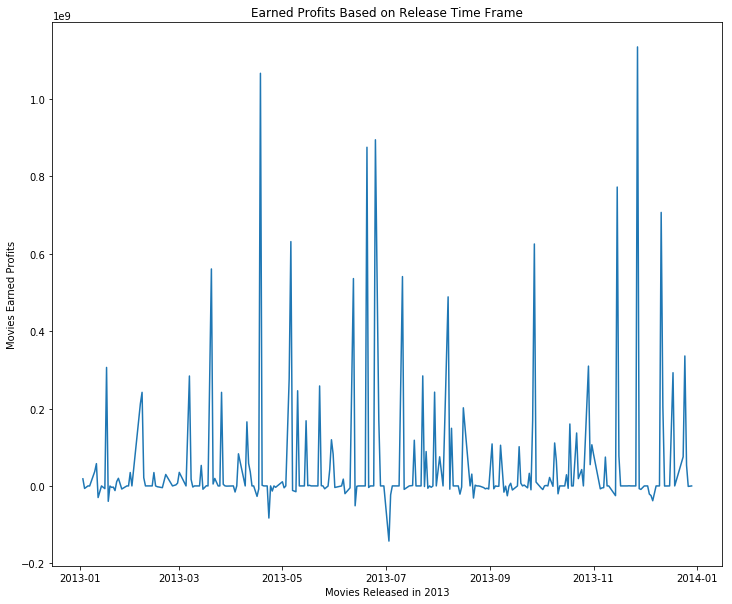

In [57]:
#Here we are adding the combination of release date and earned profit
tl = rdprf.groupby('release_date')['earned_profit'].sum()

#plotting the bar chart
plt.figure(figsize=(12,10))

plt.xlabel('Movies Released in 2013', fontsize = 10)

plt.ylabel('Movies Earned Profits', fontsize = 10)

plt.title('Earned Profits Based on Release Time Frame')

plt.plot(tl)

>We can narrow the data further by looking at another few years, but for the data that we've seen from 2013-2015 we have enough data to see when is the most popular time people go to the movies. Right after March towards the end of July there is a spike in earned profits. We see another spike in earned profits starting in November till the end of the year.

<a id='conclusions'></a>
## Conclusions

> According to our research, the movie industry has been on a constant rise. As more money was being made from viewership, the more money it generated to produce movies. With the significant amount of money made, the more there was to invest in technology, actors, and creativity. Which leads us to the popularity of different types of genres that exist. It seems there were more Dramas, Comedy and Thrillers being made than the other genres. Though, this data set looks specifically at single genre type rather than a combination of. Lastly we viewed what months were most popular for viewers to go to the movies, which seemed to be after winter and before winter. We dont have reasoning from the people, but based on our findings, those time frames in which viewers go to the movies seem pretty significant. Spring to Summer time is a popular time frame where most people go out more rather than stay at home. As for before winter, this is also before the holidays, where most people begin to take time off and relax with their family. More and more movies are being released with significant amount of profits earned to satisfy the viewers.

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

The research and help I received came from stackoverflow, slack, pandas.pydata.org, and matplotlib.org.